# Logistic Regression

>### [예제 10] Logistic Regression (TensorFlow)

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Input and Label

In [2]:
# Logistic regression : Binary Classification data
x_input = tf.constant([[1, 1], [2, 1], [1, 2], [0.5, 4], [4, 1], [2.5, 2.3]], dtype= tf.float32)
labels = tf.constant([[0], [0], [0], [1], [1], [1]], dtype= tf.float32)

W = tf.Variable(tf.random.normal((2, 1)), dtype=tf.float32)
B = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

>### Activation Function : Sigmoid Function
>$\sigma(x) = \frac{1}{1+e^{-x}}$
>### Hypothesis : Logistic Equation
>### $H(x) = \sigma(XW + b$)

In [3]:
def Hypothesis(x):
  return tf.sigmoid(tf.matmul(x ,W) + B)

>### Cost Function : Cross Entropy Error
>### $cost(W,b) = \frac{1}{m}\sum_{i=1}^{m}t\log{H(x_{i}})+(1-t)\log{(1-H(x_{i}}))$

In [4]:
def Cost():
  return -tf.reduce_mean(labels * tf.math.log(Hypothesis(x_input)) + (1 - labels) * tf.math.log(1 - Hypothesis(x_input)))

### 학습 (Training)

In [5]:
%%time
epochs = 50000
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)
check = np.array([0, epochs*0.01, epochs*0.08, epochs*0.2, epochs*0.4, epochs])

W_trained = []
b_trained = []
check_idx = 0

# 학습 (Training)
for cnt in range(0, epochs+1):
  cost_graph[cnt] = Cost()
  if cnt % (epochs/20) == 0:
    print("[{:>5}] cost = {:>10.4}, W = [[{:>7.4}] [{:>7.4}]], B = [[{:>7.4}]]".format(cnt, cost_graph[cnt], W[0][0], W[1][0], B[0]))  
  if check[check_idx] == cnt:
    W_trained.append(W.numpy())
    b_trained.append(B.numpy())
    check_idx += 1

  optimizer.minimize(Cost,[W, B])

[    0] cost =      2.114, W = [[-0.6633] [-0.1448]], B = [[ -2.271]]
[ 2500] cost =     0.3098, W = [[ 0.9522] [  1.118]], B = [[ -3.562]]
[ 5000] cost =     0.2342, W = [[  1.262] [  1.468]], B = [[ -4.851]]
[ 7500] cost =      0.188, W = [[  1.504] [  1.742]], B = [[ -5.859]]
[10000] cost =      0.157, W = [[  1.702] [  1.967]], B = [[ -6.686]]
[12500] cost =     0.1347, W = [[   1.87] [  2.157]], B = [[ -7.387]]
[15000] cost =     0.1179, W = [[  2.016] [  2.322]], B = [[ -7.996]]
[17500] cost =     0.1047, W = [[  2.146] [  2.468]], B = [[ -8.534]]
[20000] cost =    0.09424, W = [[  2.261] [  2.599]], B = [[ -9.016]]
[22500] cost =    0.08563, W = [[  2.366] [  2.718]], B = [[ -9.452]]
[25000] cost =    0.07844, W = [[  2.461] [  2.826]], B = [[  -9.85]]
[27500] cost =    0.07236, W = [[  2.549] [  2.925]], B = [[ -10.22]]
[30000] cost =    0.06714, W = [[  2.631] [  3.018]], B = [[ -10.56]]
[32500] cost =    0.06262, W = [[  2.706] [  3.104]], B = [[ -10.87]]
[35000] cost =    0.

>### Hypothesis Test 

In [6]:
# Training 결과 Test 및 Prediction

print("[Training Test]")
y = Hypothesis(x_input)
y = y.numpy().reshape((-1,))
Y = [int(y_elem>0.5) for y_elem in y]
for idx in range(x_input.shape[0]):
    print("Input {} , Target : {} => Y :{:>2}(y:{:>5.2})".format(x_input[idx], labels[idx], Y[idx], y[idx]))

[Training Test]
Input [1. 1.] , Target : [0.] => Y : 0(y:0.0027)
Input [2. 1.] , Target : [0.] => Y : 0(y:0.058)
Input [1. 2.] , Target : [0.] => Y : 0(y:0.088)
Input [0.5 4. ] , Target : [1.] => Y : 1(y: 0.96)
Input [4. 1.] , Target : [1.] => Y : 1(y: 0.97)
Input [2.5 2.3] , Target : [1.] => Y : 1(y: 0.97)


In [7]:
print("\n[ Prediction by specific data ]")
x_test = tf.constant([[1.5, 3], [0.5, 2]], dtype= tf.float32)
H_x = Hypothesis(x_test).numpy()
for idx in range(x_test.shape[0]):
  print("Input {} => y: {}".format(x_test[idx], H_x[idx]))


[ Prediction by specific data ]
Input [1.5 3. ] => y: [0.9430837]
Input [0.5 2. ] => y: [0.01983063]


<function matplotlib.pyplot.show>

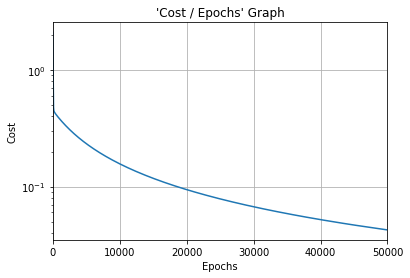

In [8]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show

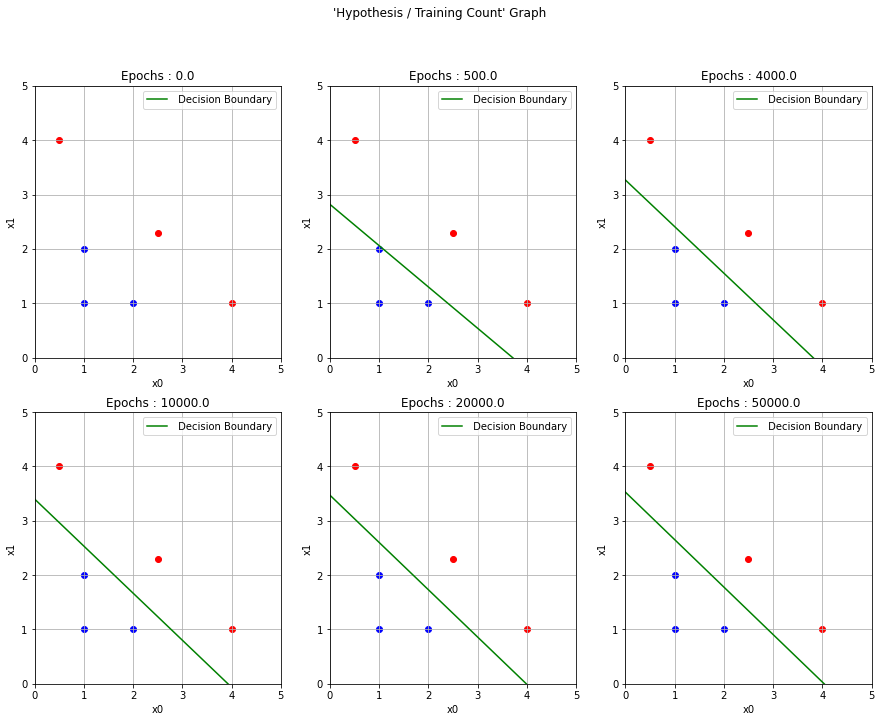

In [9]:
# 구분선 그리기
x_decision = np.linspace(0, 5, 1000)

fig, ax = plt.subplots(2, 3, figsize=(15, 11))
fig.suptitle("'Hypothesis / Training Count' Graph")

for ax_idx in range(check.size):
    W = W_trained[ax_idx]
    B = b_trained[ax_idx]
    y_decision = -(W[0] * x_decision + B)/W[1] 

    #   label의 값에 따라서 blue 또는 red 점 찍기
    for i in range(labels.shape[0]):
        if(labels[i][0] == 0):
            ax[ax_idx // 3][ax_idx % 3].scatter(x_input[i][0], x_input[i][1], color='blue')
        else:
            ax[ax_idx // 3][ax_idx % 3].scatter(x_input[i][0], x_input[i][1], color='red')
   
    ax[ax_idx // 3][ax_idx % 3].plot(x_decision, y_decision, label=' Decision Boundary', color='green')

    ax[ax_idx // 3][ax_idx % 3].set_title("Epochs : {}".format(check[ax_idx]))
    ax[ax_idx // 3][ax_idx % 3].set_xlim((0, 5))
    ax[ax_idx // 3][ax_idx % 3].set_ylim((0, 5))
    ax[ax_idx // 3][ax_idx % 3].set_xlabel("x0")
    ax[ax_idx // 3][ax_idx % 3].set_ylabel("x1")
    ax[ax_idx // 3][ax_idx % 3].grid(True)
    ax[ax_idx // 3][ax_idx % 3].legend()
    
plt.show()